### import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn import preprocessing 

import warnings
warnings.filterwarnings("ignore")

# load data

load processed data

In [2]:
all_data = pd.read_csv('./processed_data.csv')
display(all_data.head())

V0     V1     V2     V3     V4     V6     V7     V8    V10    V12  ...  \
0  0.566  0.016 -0.143  0.407  0.452 -1.812 -2.360 -0.436 -0.940 -0.073  ...   
1  0.968  0.437  0.066  0.566  0.194 -1.566 -2.360  0.332  0.188 -0.134  ...   
2  1.013  0.568  0.235  0.370  0.112 -1.367 -2.360  0.396  0.874 -0.072  ...   
3  0.733  0.368  0.283  0.165  0.599 -1.200 -2.086  0.403  0.011 -0.014  ...   
4  0.684  0.638  0.260  0.209  0.337 -1.073 -2.086  0.314 -0.251  0.199  ...   

     V24    V27    V29    V30    V31    V35    V36    V37  target  label  
0  0.800  0.168  0.136  0.109 -0.615 -5.101 -2.608 -3.508   0.175  train  
1  0.801  0.338 -0.128  0.124  0.032  0.364 -0.335 -0.730   0.676  train  
2  0.961  0.326 -0.009  0.361  0.277  0.364  0.765 -0.589   0.633  train  
3  1.435  0.277  0.015  0.417  0.279  0.364  0.333 -0.112   0.206  train  
4  0.881  0.332  0.183  1.078  0.328  0.364 -0.280 -0.028   0.384  train  

[5 rows x 27 columns]

In [3]:
all_data.shape

(4813, 27)

# max min normalization
$ x = \frac{x - min(x)}{max(x) - min(x)} $

In [4]:
columns=list(all_data.columns)
# delete label column index
columns.remove('label')
# delete target value
columns.remove('target')
all_data[columns].describe()

V0           V1           V2           V3           V4  \
count  4813.000000  4813.000000  4813.000000  4813.000000  4813.000000   
mean      0.000080     0.000082    -0.000043    -0.000013     0.000085   
std       1.000013     1.000016     1.000007     0.999995     1.000015   
min      -4.814000    -5.488000    -4.283000    -3.956000    -4.921000   
25%      -0.468000    -0.319000    -0.625000    -0.651000    -0.428000   
50%       0.245000     0.237000     0.105000     0.073000     0.114000   
75%       0.666000     0.595000     0.698000     0.704000     0.576000   
max       2.121000     2.120000     2.828000     2.603000     4.475000   

                V6           V7           V8          V10          V12  ...  \
count  4813.000000  4813.000000  4813.000000  4813.000000  4813.000000  ...   
mean      0.000118     0.000116     0.000049    -0.000089     0.000071  ...   
std       1.000035     1.000030     0.999994     1.000017     1.000014  ...   
min      -5.649000    -5.625000    -6.059000    -2.584000    -5.505000  ...   
25%      -0.494000    -0.368000    -0.429000    -0.476000    -0.434000  ...   
50%       0.191000     0.198000     0.231000     0.133000     0.125000  ...   
75%       0.705000     0.684000     0.637000     0.626000     0.604000  ...   
max       1.895000     1.918000     2.408000     4.830000     4.011000  ...   

               V20          V23          V24          V27          V29  \
count  4813.000000  4813.000000  4813.000000  4813.000000  4813.000000   
mean     -0.000056     0.000022    -0.000264     0.000046     0.000014   
std       0.999991     1.000003     1.000184     0.999999     0.999997   
min      -3.402000    -5.552000    -1.344000    -6.874000    -2.912000   
25%      -0.639000    -0.187000    -1.191000     0.056000    -0.721000   
50%      -0.066000     0.331000     0.094000     0.270000    -0.097000   
75%       0.496000     0.360000     0.821000     0.399000     0.623000   
max       4.056000     1.906000     2.423000     0.925000     4.580000   

               V30          V31          V35          V36          V37  
count  4813.000000  4813.000000  4813.000000  4813.000000  4813.000000  
mean      0.000006    -0.000004    -0.000079    -0.000110     0.000083  
std       0.999993     0.999999     1.000062     1.000019     1.000017  
min      -4.507000    -7.698000    -7.477000    -2.608000    -3.630000  
25%      -0.301000    -0.300000    -0.349000    -0.485000    -0.666000  
50%       0.038000     0.217000     0.364000     0.115000    -0.043000  
75%       0.469000     0.578000     0.364000     0.647000     0.647000  
max       3.139000     2.013000     2.324000     5.238000     3.021000  

[8 rows x 25 columns]

# max min normalization

In [5]:
def norm_min_max(col):
    return (col-col.min())/(col.max()-col.min())

all_data[columns] = all_data[columns].apply(norm_min_max,axis=0)
all_data.describe()

V0           V1           V2           V3           V4  \
count  4813.000000  4813.000000  4813.000000  4813.000000  4813.000000   
mean      0.694172     0.721357     0.602300     0.603139     0.523743   
std       0.144198     0.131443     0.140628     0.152462     0.106430   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.626676     0.679416     0.514414     0.503888     0.478182   
50%       0.729488     0.752497     0.617072     0.614270     0.535866   
75%       0.790195     0.799553     0.700464     0.710474     0.585036   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                V6           V7           V8          V10          V12  ...  \
count  4813.000000  4813.000000  4813.000000  4813.000000  4813.000000  ...   
mean      0.748823     0.745740     0.715607     0.348518     0.578507  ...   
std       0.132560     0.132577     0.118105     0.134882     0.105088  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.683324     0.696938     0.664934     0.284327     0.532892  ...   
50%       0.774125     0.771974     0.742884     0.366469     0.591635  ...   
75%       0.842259     0.836405     0.790835     0.432965     0.641971  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

               V23          V24          V27          V29          V30  \
count  4813.000000  4813.000000  4813.000000  4813.000000  4813.000000   
mean      0.744438     0.356712     0.881401     0.388683     0.589459   
std       0.134085     0.265512     0.128221     0.133475     0.130786   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.719362     0.040616     0.888575     0.292445     0.550092   
50%       0.788817     0.381736     0.916015     0.375734     0.594428   
75%       0.792706     0.574728     0.932555     0.471837     0.650798   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               V31          V35          V36          V37       target  
count  4813.000000  4813.000000  4813.000000  4813.000000  2888.000000  
mean      0.792709     0.762873     0.332385     0.545795     0.126353  
std       0.102976     0.102037     0.127456     0.150356     0.983966  
min       0.000000     0.000000     0.000000     0.000000    -3.044000  
25%       0.761816     0.727273     0.270584     0.445647    -0.350250  
50%       0.815055     0.800020     0.347056     0.539317     0.313000  
75%       0.852229     0.800020     0.414861     0.643061     0.793250  
max       1.000000     1.000000     1.000000     1.000000     2.538000  

[8 rows x 26 columns]

use sklearn method to max min normalization

In [6]:
# import library
from sklearn import preprocessing 
min_max_scaler = preprocessing.MinMaxScaler()

# after processing, the data is transformed into a Numpy array
all_data[columns] = min_max_scaler.fit_transform(all_data[columns])

all_data[columns] = pd.DataFrame(all_data,columns=columns)
all_data.describe()

V0           V1           V2           V3           V4  \
count  4813.000000  4813.000000  4813.000000  4813.000000  4813.000000   
mean      0.694172     0.721357     0.602300     0.603139     0.523743   
std       0.144198     0.131443     0.140628     0.152462     0.106430   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.626676     0.679416     0.514414     0.503888     0.478182   
50%       0.729488     0.752497     0.617072     0.614270     0.535866   
75%       0.790195     0.799553     0.700464     0.710474     0.585036   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                V6           V7           V8          V10          V12  ...  \
count  4813.000000  4813.000000  4813.000000  4813.000000  4813.000000  ...   
mean      0.748823     0.745740     0.715607     0.348518     0.578507  ...   
std       0.132560     0.132577     0.118105     0.134882     0.105088  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.683324     0.696938     0.664934     0.284327     0.532892  ...   
50%       0.774125     0.771974     0.742884     0.366469     0.591635  ...   
75%       0.842259     0.836405     0.790835     0.432965     0.641971  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

               V23          V24          V27          V29          V30  \
count  4813.000000  4813.000000  4813.000000  4813.000000  4813.000000   
mean      0.744438     0.356712     0.881401     0.388683     0.589459   
std       0.134085     0.265512     0.128221     0.133475     0.130786   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.719362     0.040616     0.888575     0.292445     0.550092   
50%       0.788817     0.381736     0.916015     0.375734     0.594428   
75%       0.792706     0.574728     0.932555     0.471837     0.650798   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               V31          V35          V36          V37       target  
count  4813.000000  4813.000000  4813.000000  4813.000000  2888.000000  
mean      0.792709     0.762873     0.332385     0.545795     0.126353  
std       0.102976     0.102037     0.127456     0.150356     0.983966  
min       0.000000     0.000000     0.000000     0.000000    -3.044000  
25%       0.761816     0.727273     0.270584     0.445647    -0.350250  
50%       0.815055     0.800020     0.347056     0.539317     0.313000  
75%       0.852229     0.800020     0.414861     0.643061     0.793250  
max       1.000000     1.000000     1.000000     1.000000     2.538000  

[8 rows x 26 columns]

# Box-Cox transformation

check the data distribution of feature variable 'V0' histogram, and draw the Q-Q map (probability map) to see if the data is approximately normal distribution, and the feature target value correlation

In [7]:
cond = all_data['label'] == 'train'
train_data = all_data[cond]
train_data.drop(labels='label',axis = 1,inplace=True)

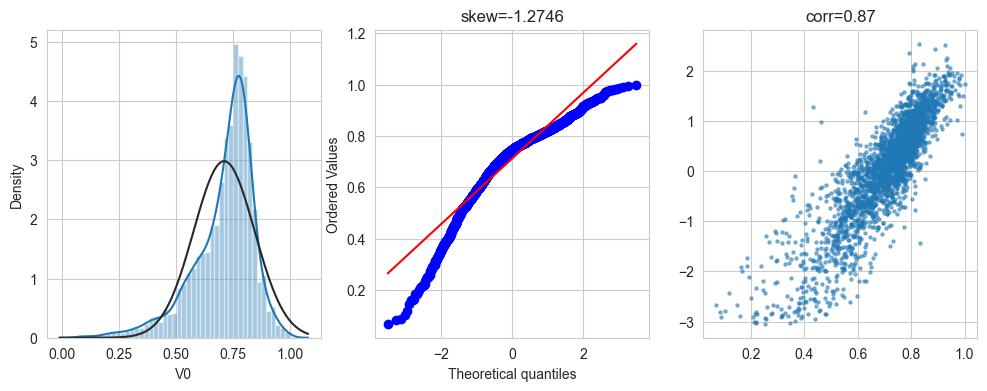

In [8]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.distplot(train_data['V0'],fit=stats.norm)

# plot Q-Q map
plt.subplot(1,3,2)
stats.probplot(train_data['V0'],plot=plt)
plt.title('skew='+'{:.4f}'.format(stats.skew(train_data['V0'])))

# plot scatter plot
ax = plt.subplot(1,3,3)
plt.scatter(train_data['V0'], train_data['target'],s = 5,alpha=0.5)
plt.title('corr='+'{:.2f}'.format(np.corrcoef(train_data['V0'], train_data['target'])[0][1]))
plt.show()

skew function calculates the skewness of the data set:
if skew = 0, normal distribution
if skew > 0, offset to the right
if skew < 0, offset to the left

# check the distribution of all feature variables

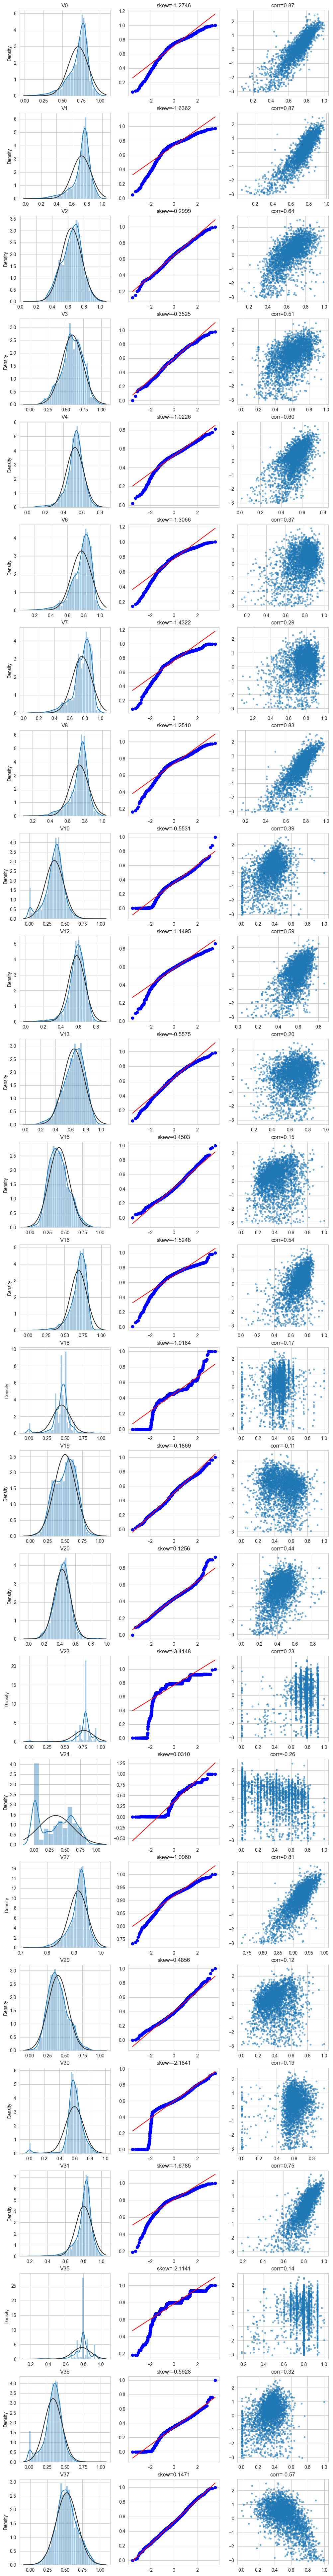

In [9]:
fcols = 3
columns = list(train_data.columns)
columns.remove('target')
frows = len(columns)
plt.figure(figsize=(4*fcols,4*frows))
i=0
for col in columns:
    feature = train_data[[col, 'target']]
        
    i+=1
    plt.subplot(frows,fcols,i)
    sns.distplot(feature[col] , fit=stats.norm)
    plt.title(col)
    plt.xlabel('')
        
    i+=1
    plt.subplot(frows,fcols,i)
    _=stats.probplot(feature[col], plot=plt)
    plt.title('skew='+'{:.4f}'.format(stats.skew(feature[col])))
    plt.xlabel('')
    plt.ylabel('')
        
    i+=1
    plt.subplot(frows,fcols,i)
    plt.plot(feature[col], feature['target'],'.',alpha=0.5)
    plt.title('corr='+'{:.2f}'.format(np.corrcoef(feature[col], feature['target'])[0][1]))

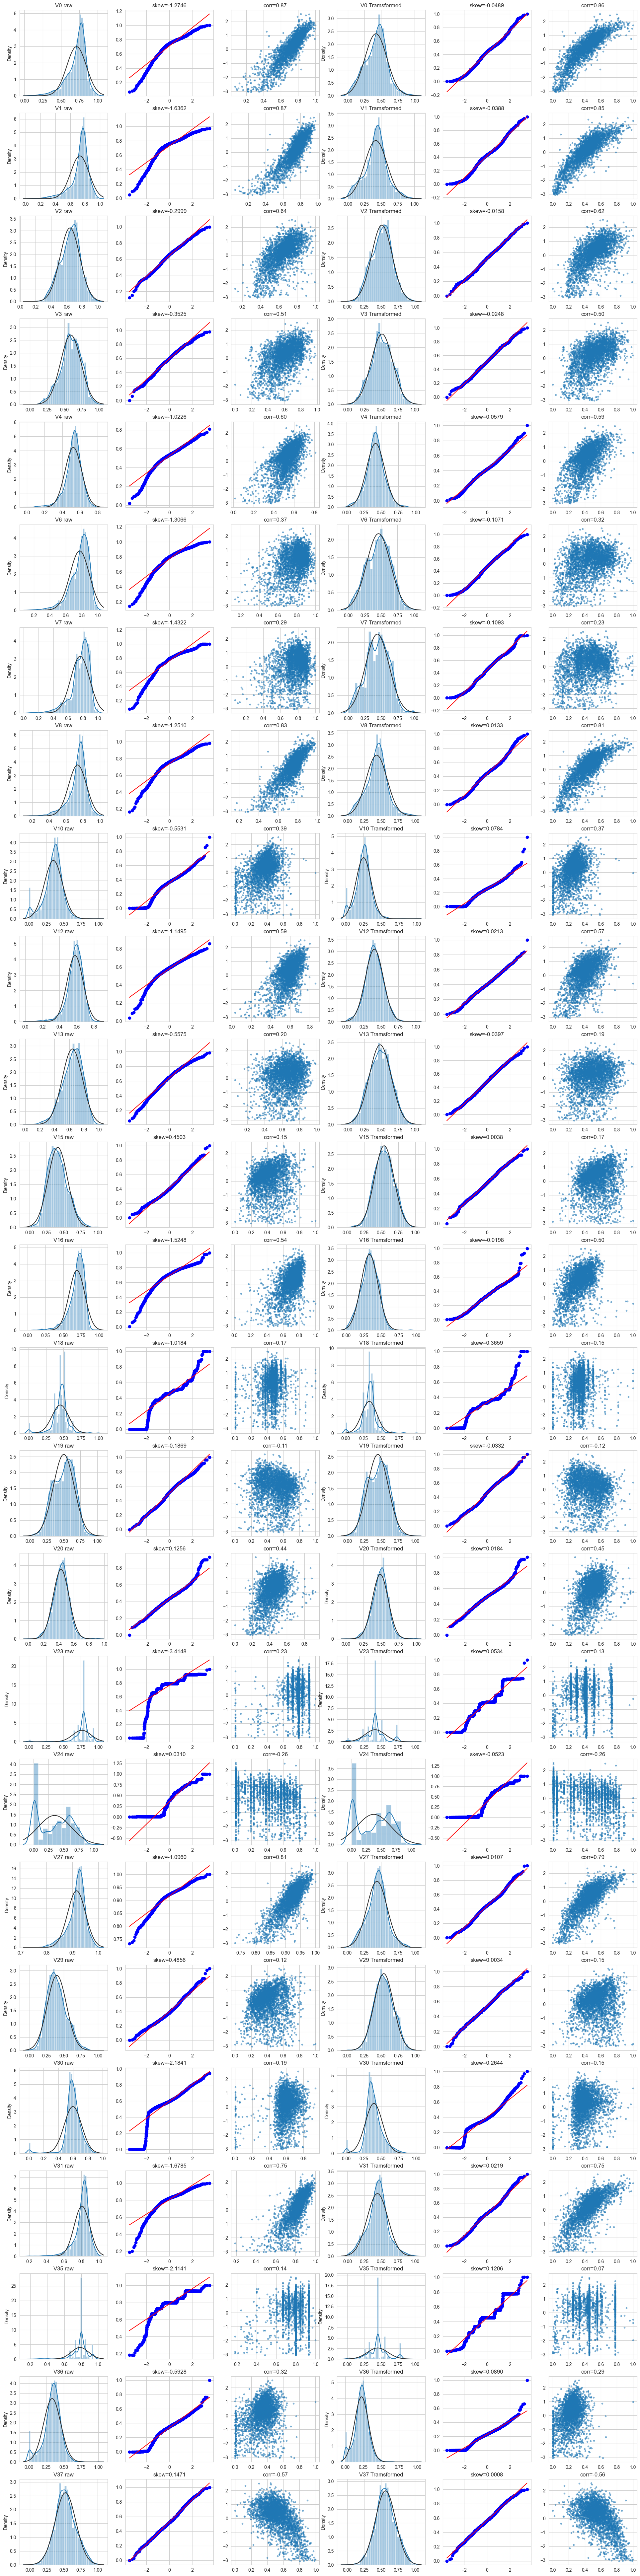

In [10]:
# show the effect of Box-Cox transformation on data distribution
fcols = 6
columns = list(train_data.columns)
columns.remove('target')
frows = len(columns)
plt.figure(figsize=(4*fcols,4*frows))
i=0
def norm_min_max(feature):
    return (feature-feature.min())/(feature.max()-feature.min())

for col in columns:
    feature = train_data[[col, 'target']].dropna()

    i+=1
    plt.subplot(frows,fcols,i)
    sns.distplot(feature[col] , fit=stats.norm)
    plt.title(col+' raw')
    plt.xlabel('')

    i+=1
    plt.subplot(frows,fcols,i)
    _=stats.probplot(feature[col], plot=plt)
    plt.title('skew='+'{:.4f}'.format(stats.skew(feature[col])))
    plt.xlabel('')
    plt.ylabel('')

    i+=1
    plt.subplot(frows,fcols,i)
    plt.plot(feature[col], feature['target'],'.',alpha=0.5)
    plt.title('corr='+'{:.2f}'.format(np.corrcoef(feature[col], feature['target'])[0][1]))
    
    # Box-Cox转变，视图可视化
    i+=1
    plt.subplot(frows,fcols,i)
    trans_feature, lambda_feature = stats.boxcox(feature[col].dropna()+1)
    trans_feature = norm_min_max(trans_feature)      
    sns.distplot(trans_feature , fit=stats.norm)
    plt.title(col+' Tramsformed')
    plt.xlabel('')

    i+=1
    plt.subplot(frows,fcols,i)
    _=stats.probplot(trans_feature, plot=plt)
    plt.title('skew='+'{:.4f}'.format(stats.skew(trans_feature)))
    plt.xlabel('')
    plt.ylabel('')

    i+=1
    plt.subplot(frows,fcols,i)
    plt.plot(trans_feature, feature['target'],'.',alpha=0.5)
    plt.title('corr='+'{:.2f}'.format(np.corrcoef(trans_feature,feature['target'])[0][1]))

The Box-Cox transform is given by:
$ y = \frac{x^{\lambda} - 1}{\lambda} $, for $\lambda \neq 0$
$ log(x) $, for $\lambda = 0$

In [11]:
columns=list(all_data.columns)
# delete label column index
columns.remove('label')
# delete target value
columns.remove('target')

for col in columns:   
    # transform column
    all_data.loc[:,col], _ = stats.boxcox(all_data.loc[:,col]+1)

In [12]:
A = np.array([0,1,4,5])
print(A)
stats.boxcox(A + 1)

[0 1 4 5]


(array([0.        , 0.79703505, 2.24710865, 2.60349862]), 0.3940016179307235)

In [13]:
np.log(0 + 1)

0.0

In [14]:
lambda_ = 0.39400163959564993

((A+1)**lambda_ - 1)/lambda_

array([0.        , 0.79703506, 2.2471087 , 2.60349868])

In [15]:
from sklearn.model_selection import train_test_split
def get_train_data():
    train_data = all_data[all_data["label"]=="train"]
    y = train_data.target
    X = train_data.drop(["label","target"],axis=1)
    return X,y
def split_train_data():
    train_data = all_data[all_data["label"]=="train"]
    y = train_data.target
    X = train_data.drop(["label","target"],axis=1)
    X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.2)
    return X_train,X_valid,y_train,y_valid

def get_test_data():
    test_data = all_data[all_data["label"]=="test"].reset_index(drop=True)
    return test_data.drop(["label","target"],axis=1)

# find_outliers

In [16]:
from sklearn.metrics import mean_squared_error

def find_outliers(model, X, y, sigma = 3):
    # train model
    model.fit(X,y)
    y_pred = pd.Series(model.predict(X), index=y.index)
    
    # calculate residuals
    resid = y - y_pred
    mean_resid = resid.mean()
    std_resid = resid.std()
    
    # Z-score normalization
    z = (resid - mean_resid)/std_resid # Z-score归一化 
    outliers = z[abs(z)>sigma].index # find outliers
    
    print('R2=',model.score(X,y))
    print("mse=",mean_squared_error(y,y_pred))
    print('---------------------------------------')

    print('mean of residuals:',mean_resid)
    print('std of residuals:',std_resid)
    print('---------------------------------------')

    print(len(outliers),'outliers:')
    print(outliers.tolist())

    plt.figure(figsize=(15,5))
    plt.subplot(1, 3, 1)
    plt.plot(y,y_pred,'.')
    plt.plot(y.loc[outliers],y_pred.loc[outliers],'ro')
    plt.legend(['Accepted','Outlier'])
    plt.xlabel('y')
    plt.ylabel('y_pred')

    plt.subplot(1, 3, 2)
    plt.plot(y,y-y_pred,'.')
    plt.plot(y.loc[outliers],y.loc[outliers]-y_pred.loc[outliers],'ro')
    plt.legend(['Accepted','Outlier'])
    plt.xlabel('y')
    plt.ylabel('y - y_pred')

    ax_133=plt.subplot(1,3,3)
    z.plot.hist(bins=50,ax=ax_133)
    z.loc[outliers].plot.hist(color='r',bins=50,ax=ax_133)
    plt.legend(['Accepted','Outlier'])
    plt.xlabel('z')
    
    plt.show()
    
    return outliers

## use Ridge regression to find outliers

R2= 0.8689413870479384
mse= 0.12684550400768643
---------------------------------------
mean of residuals: -3.2414821827005957e-16
std of residuals: 0.3562154415443902
---------------------------------------
30 outliers:
[348, 884, 1046, 1069, 1145, 1164, 1310, 1458, 1493, 1523, 1530, 1704, 1874, 2002, 2159, 2160, 2279, 2528, 2620, 2645, 2647, 2667, 2668, 2669, 2696, 2697, 2769, 2807, 2842, 2863]


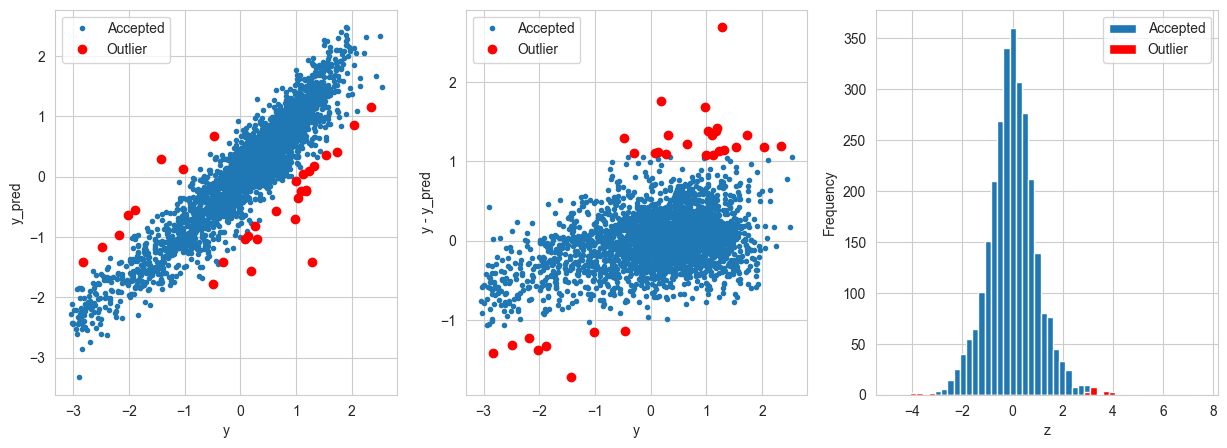

In [17]:
# get train data
from sklearn.linear_model import Ridge
X_train, y_train = get_train_data()

# use Ridge regression to find outliers
outliers1 = find_outliers(Ridge(), X_train, y_train)

## use Lasso regression to find outliers

R2= 0.6220218641738003
mse= 0.365827365808436
---------------------------------------
mean of residuals: 6.618282407183759e-16
std of residuals: 0.6049413865908967
---------------------------------------
31 outliers:
[332, 343, 376, 430, 884, 1064, 1065, 1126, 1311, 1365, 1442, 1477, 1828, 1874, 1932, 2030, 2253, 2254, 2255, 2256, 2257, 2279, 2281, 2579, 2580, 2581, 2636, 2663, 2667, 2790, 2807]


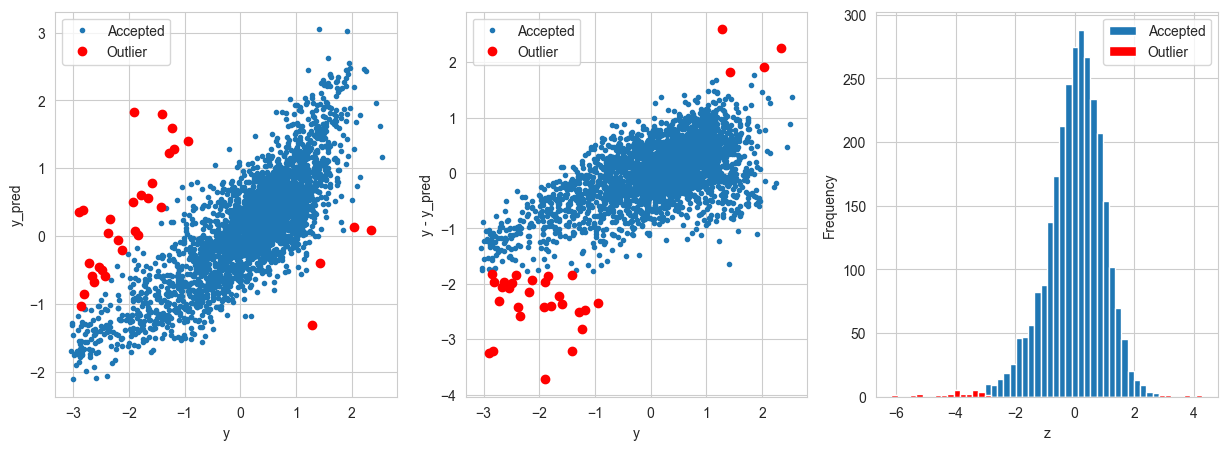

In [18]:
# get train data
from sklearn.linear_model import Lasso
X_train, y_train = get_train_data()

# use Lasso regression to find outliers
outliers2 = find_outliers(Lasso(), X_train, y_train)

## use SVR to find outliers

R2= 0.6631924753429712
mse= 0.3259802561341701
---------------------------------------
mean of residuals: -0.04418097187352091
std of residuals: 0.5693334127607439
---------------------------------------
39 outliers:
[332, 343, 376, 884, 1064, 1065, 1126, 1138, 1311, 1365, 1442, 1477, 1828, 1874, 1932, 2030, 2161, 2253, 2254, 2255, 2256, 2257, 2264, 2279, 2281, 2334, 2339, 2579, 2580, 2581, 2620, 2635, 2636, 2637, 2645, 2663, 2667, 2790, 2807]


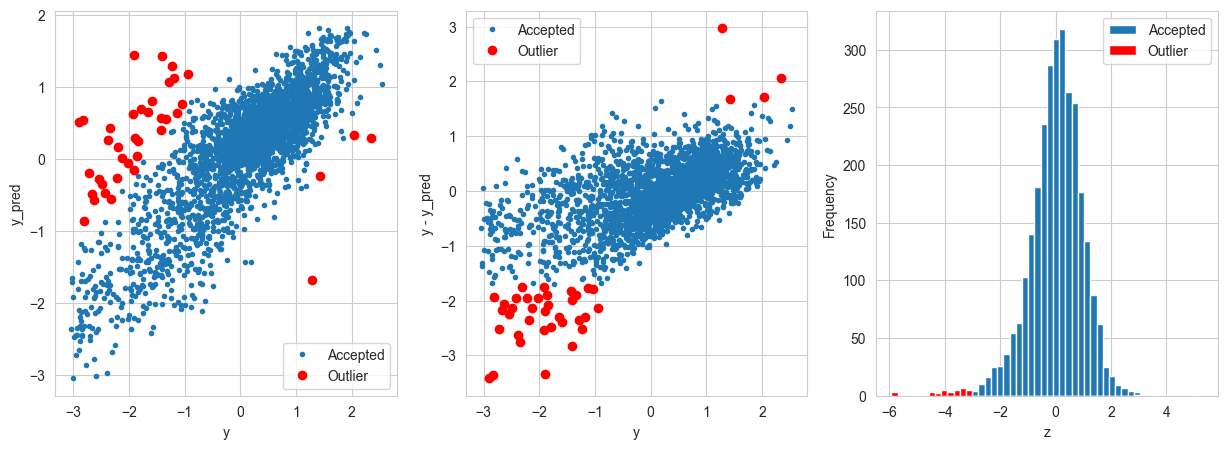

In [19]:
# get train data
from sklearn.svm import SVR
X_train, y_train = get_train_data()

# use SVR to find outliers
outliers3 = find_outliers(SVR(), X_train, y_train)

## use XGBoost to find outliers

R2= 0.9982490968340522
mse= 0.0016946173132058918
---------------------------------------
mean of residuals: 4.2233555495221416e-05
std of residuals: 0.04117283705322675
---------------------------------------
37 outliers:
[257, 288, 293, 373, 499, 564, 583, 674, 675, 722, 805, 847, 1160, 1359, 1530, 1648, 1878, 1954, 1959, 1961, 1972, 1973, 1981, 2004, 2098, 2172, 2189, 2211, 2391, 2552, 2556, 2670, 2676, 2685, 2696, 2713, 2747]


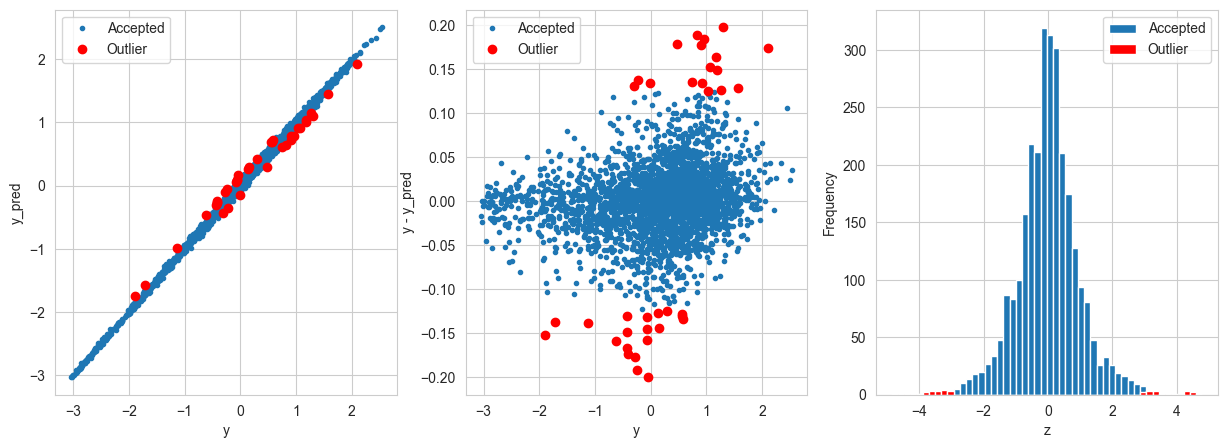

In [20]:
import xgboost as xgb
X_train, y_train = get_train_data()

outliers4 = find_outliers(xgb.XGBRegressor(), X_train, y_train)

## drop outliers

In [21]:
outliers12 = np.union1d(outliers1,outliers2)
outliers34 = np.union1d(outliers3,outliers4)
outliers = np.union1d(outliers12,outliers34)
display(outliers)
all_data = all_data.drop(labels=outliers)
all_data.to_csv('./processed_data_2.csv',index=False)
all_data.shape

array([ 257,  288,  293,  332,  343,  348,  373,  376,  430,  499,  564,
        583,  674,  675,  722,  805,  847,  884, 1046, 1064, 1065, 1069,
       1126, 1138, 1145, 1160, 1164, 1310, 1311, 1359, 1365, 1442, 1458,
       1477, 1493, 1523, 1530, 1648, 1704, 1828, 1874, 1878, 1932, 1954,
       1959, 1961, 1972, 1973, 1981, 2002, 2004, 2030, 2098, 2159, 2160,
       2161, 2172, 2189, 2211, 2253, 2254, 2255, 2256, 2257, 2264, 2279,
       2281, 2334, 2339, 2391, 2528, 2552, 2556, 2579, 2580, 2581, 2620,
       2635, 2636, 2637, 2645, 2647, 2663, 2667, 2668, 2669, 2670, 2676,
       2685, 2696, 2697, 2713, 2747, 2769, 2790, 2807, 2842, 2863])

(4715, 27)

In [22]:
outliers.shape

(98,)

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train,y_train = get_train_data()
X_train = np.matrix(X_train)
VIF_list=[round(variance_inflation_factor(X_train, i),2) for i in range(X_train.shape[1])]
print(VIF_list)

[110.76, 105.32, 78.59, 18.48, 153.18, 129.73, 69.49, 158.74, 59.9, 113.36, 15.11, 185.91, 84.86, 13.52, 12.8, 42.57, 36.69, 4.9, 121.85, 234.42, 12.58, 76.0, 39.32, 53.71, 38.38]


In [24]:
X_train.shape

(2790, 25)

## PCA dimensionality reduction

In [25]:
X_train,y_train = get_train_data()
X_train.shape

(2790, 25)

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 22,whiten=True)

X_train,y_train = get_train_data()
X_train_pca = np.matrix(pca.fit_transform(X_train))
VIF_pca_list=[round(variance_inflation_factor(X_train_pca, i),2) for i in range(X_train_pca.shape[1])]
print(VIF_pca_list)
# save data
np.savez('./train_data_pca',X_train = X_train_pca,y_train = y_train)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [27]:
X_test = get_test_data()
X_test_pca = pca.transform(X_test)

display(X_test_pca)
# save data
np.savez('./test_data_pca',X_test = X_test_pca)

array([[-4.11871600e-01, -1.08188796e-01, -4.27745039e-01, ...,
         4.44593519e-01,  2.45417663e-01,  5.42400814e-01],
       [-3.44356879e-01,  2.38917366e-01, -3.76115841e-01, ...,
        -2.11927252e-01,  4.27776474e-01,  6.88479575e-01],
       [-8.39614587e-01,  9.49047612e-01, -3.59670998e-01, ...,
        -1.92423226e-04,  6.98947576e-01,  1.11982215e+00],
       ...,
       [-3.09839849e+00, -5.93276057e-01, -1.13652841e+00, ...,
        -4.34570486e-01, -9.19852230e-02,  5.31788602e-02],
       [-3.02283240e+00, -6.21424459e-01, -1.15209452e+00, ...,
         1.14202679e-01,  2.60199365e-01, -8.22174278e-02],
       [-2.93166263e+00, -7.27661130e-01, -1.16166061e+00, ...,
         2.16275967e-01, -1.24102182e+00,  2.14447284e+00]])